<h1>Abstract

The main purpose of the project was to analyze sales of different businesses over the period of 30 months. For this purpose ETL was performed and data were analyzed using SQL in a python environment and visualized it using matplotlib. Trends in different business, year over year percent different, and a comparison was created. For this purpose time series was used. Most of the businesses showed upward trends in sales. Around 2008 almost all businesses analyzed showed a crash.  Book stores sales showed a downward trend in both sales, revenue and sports good showed an upward trend in both cases. Men and women trends showed a downward trend during 2020.


 <h1>Introduction:</h1>
In order to analyze data ETL was performed to clean and modify data manually and using python. After that, the data was uploaded manually as one CSV file to the database and several quires were run to check the performance of the data. A sample data was created to check the SQL connection on the visual studio code. After the connection was successful. I used my device’s terminal to check if the database existed. After I created the connection I run SQL queries on visual studio using a python environment. The data was analyzed and trends were created using SQL queries while using that data was visualization using the python library matplotlib.


<h1>ETL process:</h1>
The first step was to create 1 CSV file from all 30 sheets. The command symbols, characters were removed. The columns were converted into rows and rows into columns. Total per year was dropped and monthly data was kept for all 30 years. Since I realized that I can easily sum the values yearly if I have monthly data. Monthly data would give me an insight seasonal basis. The business’s names were modified so SQL workbench can read them as columns names. Date was converted to incorrect format in order to ease the process of writing queries on SQL. for most of the data null values were changed with the mean using python.  Data was uploaded many on SQL workbench manually and some testing was performed every time before coming with the final CSC file.  Most of the ETL was performed manually. However, If python was used for this purpose the process would have sped up. ETL process took the longest in the overall project and after the correct CSV file was created analysis and visualization became really easy.



<h1>Data Exploration:</h1>
The dataset contains sales of 66 businesses every month over 30 years. There were several categories of data containing food, gas, hobbies, toys, electronics, sports goods, etc. There were some missing values in the data and some categories stopped  showed some errors.



<h3>Data preparation, Reading Sample Data, Reading the MRTS Data, Writing an Installation Script
 are on the the 8.1 try it activity</h3>




<h1>Running Queries in MySQL Workbench:</h1>

```
select right(date,4) as year,sum(Mens_clothing_stores),sum(Womens_clothing_stores)
from dfmm
group by year
```
```
year	sum(Mens_clothing_stores)	sum(Womens_clothing_stores)
1992	10179	31815
1993	9962	32350
1994	10032	30585
1995	9315	28696
1996	9546	28238
1997	10069	27822
1998	10196	28332
1999	9667	29549
2000	9507	31447
2001	8625	31453
2002	8112	31246
2003	8249	32565
2004	8566	34954
2005	8737	37075
2006	8844	38809
2007	8772	40294
2008	8351	38402
2009	7353	36055
2010	7285	37690
2011	7860	40048
2012	8272	41794
2013	8850	41508
2014	9251	41019
2015	9399	40239
2016	9281	39751
2017	9296	39212
2018	9222	39847
2019	9110	38951
2020	5327	26164
```

```select 
CASE WHEn Retail_sales_total <=10000 THEN 'up to 10000'
WHEn  Retail_sales_total <=100000 THEN 'up to 100000'
WHEn  Retail_sales_total <=200000 THEN 'up to 200000'
WHEn  Retail_sales_total <=300000 THEN 'up to 300000'
WHEn  Retail_sales_total <=400000 THEN 'up to 400000'
WHEn  Retail_sales_total <=500000 THEN 'up to 500000'
else '50000+' end as bin,
count(*) as count from 
(select date as year, Retail_sales_total from dfmm)a
group by 1
```
```
Output:
​​bin	count
up to 200000	59
up to 300000	110
up to 400000	121
up to 500000	56
50000	2
```

<h1>Running Queries from Python</h1>
```
cursor=cnx.cursor()
import mysql.connector
import matplotlib.pyplot as plt

cnx=mysql.connector.connect(user='root',password='h1h2h3h4',
                            host='127.0.0.1',
                            database='project_2',
                            auth_plugin='myswql_native_password')



sql=(""" 
      select right(date,4) as year,sum(Mens_clothing_stores),sum(Womens_clothing_stores)
from dfmm
group by year
      """)
cursor.execute(sql)
month=[]
men=[]
women=[]
for row in cursor.fetchall():
 print(row)
 month.append(row[0])
 men.append(row[1])
 women.append(row[2])
     
cursor.close()
cnx.close()

fig = plt.figure(figsize=(20, 10))

plt.plot(month,men)
plt.plot(month,women)
plt.title('men and women clothing trends')
plt.legend([ "men trends","women trends"])
plt.xticks(month[::2],rotation=90, fontsize = 'small')

plt.show()
```



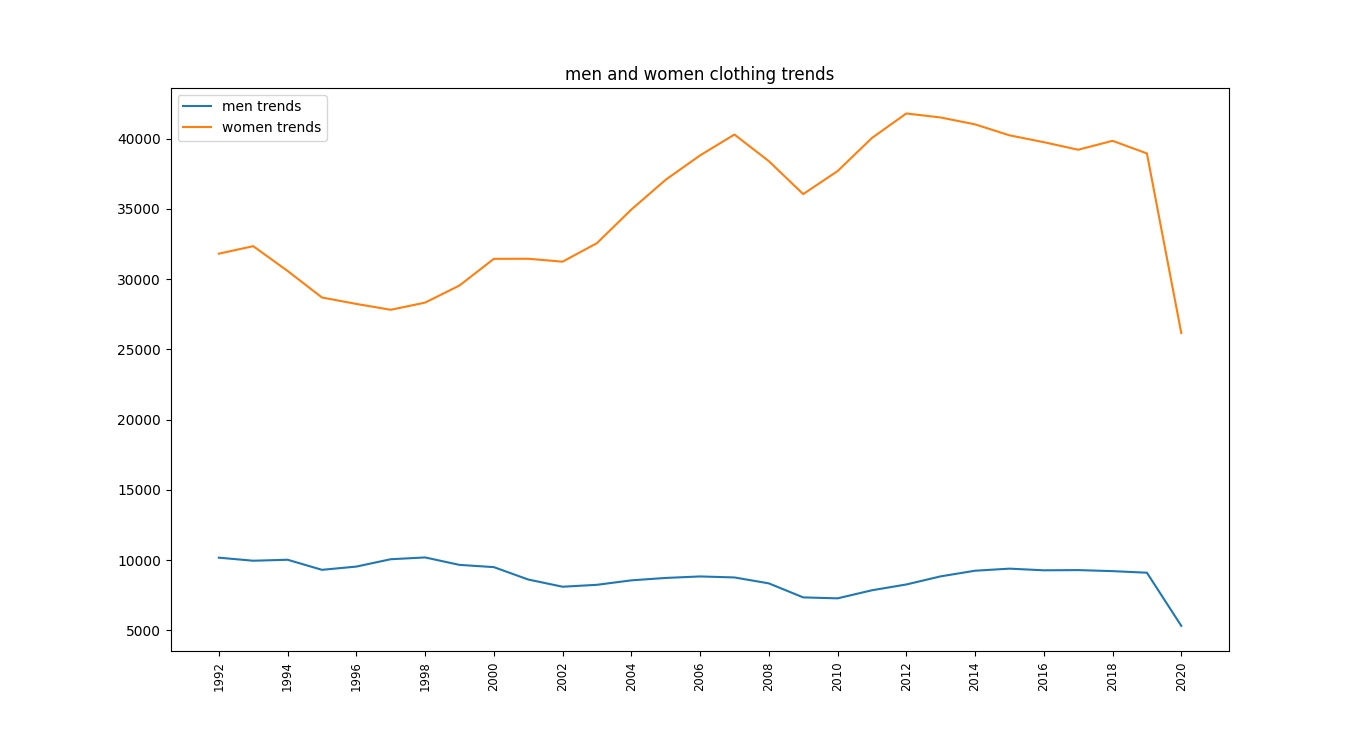

<h1>Explore Trends:</h1>
I explored trends for retail food services. There was an upward increase in the trends. I saw them on m monthly basis and yearly basis. All categories showed upward and downward trends on a seasonal basis. It seems like trends are upward during summer and downward during winter.
```
ursor=cnx.cursor()
 Monthly food trends.


sql=(""" select date,Retail_and_food_services_sales_total, Retail_sales_total,Retail_sales_and_food_services_EMVP
from dfmm
     """)
cursor.execute(sql)
date=[]
Retail_and_food_services_sales_total=[]
Retail_sales_total=[]
Retail_sales_and_food_services_EMVP=[]
for row in cursor.fetchall():
print(row)
date.append(row[0])
Retail_and_food_services_sales_total.append(row[1])
Retail_sales_total.append(row[2])
Retail_sales_and_food_services_EMVP.append(row[3])
   
cursor.close()
cnx.close()
 
fig = plt.figure(figsize=(20, 10))
 
plt.plot(date,Retail_and_food_services_sales_total)
plt.plot(date, Retail_sales_total)
plt.plot(date, Retail_sales_and_food_services_EMVP)
plt.title('food services trends')
plt.legend([ "retail & food ","retail total","retail food emvp"])
plt.xticks(date[::2],rotation=90, fontsize = 'small')
```
Yearly food trends:
```
-- total sales for the retail and food services categories
select right(date,4) as year,sum(Retail_and_food_services_sales_total),sum( Retail_sales_total),sum(Retail_sales_and_food_services_EMVP)
 
from dfmm
group by year
```

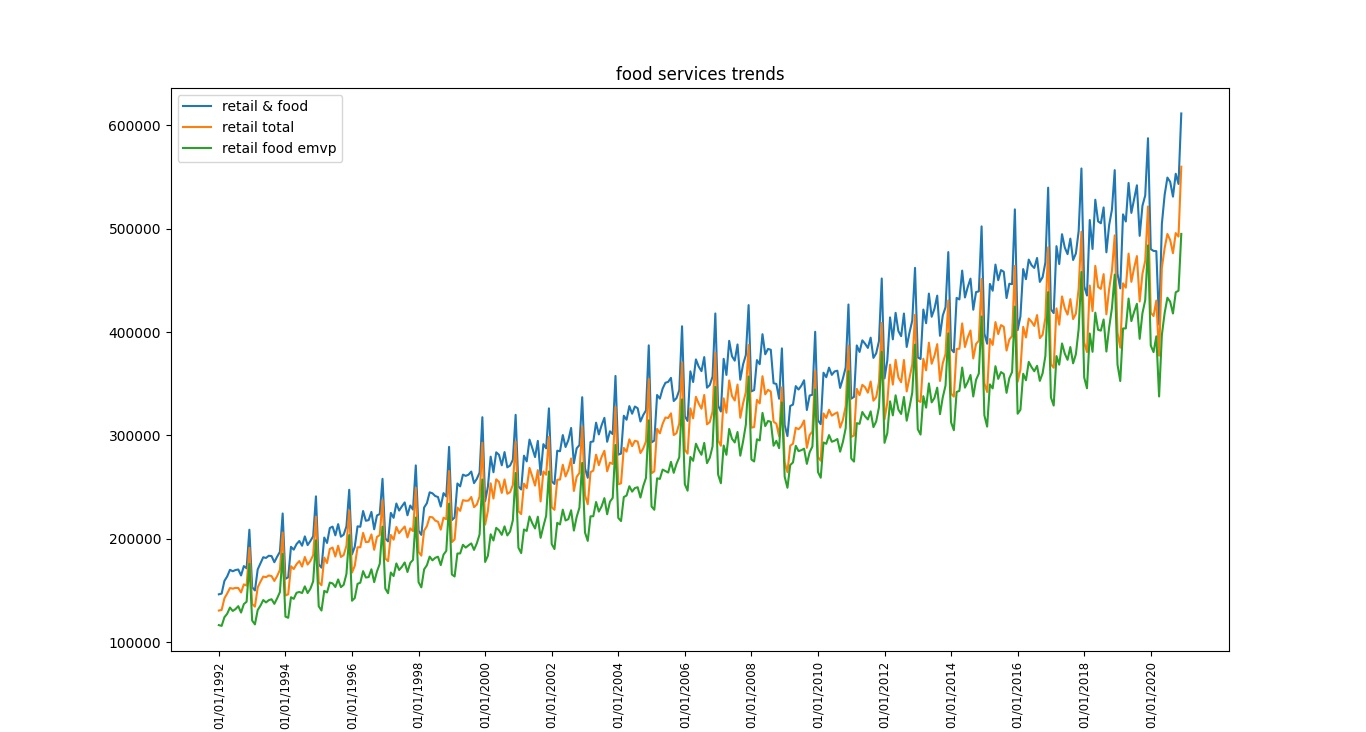


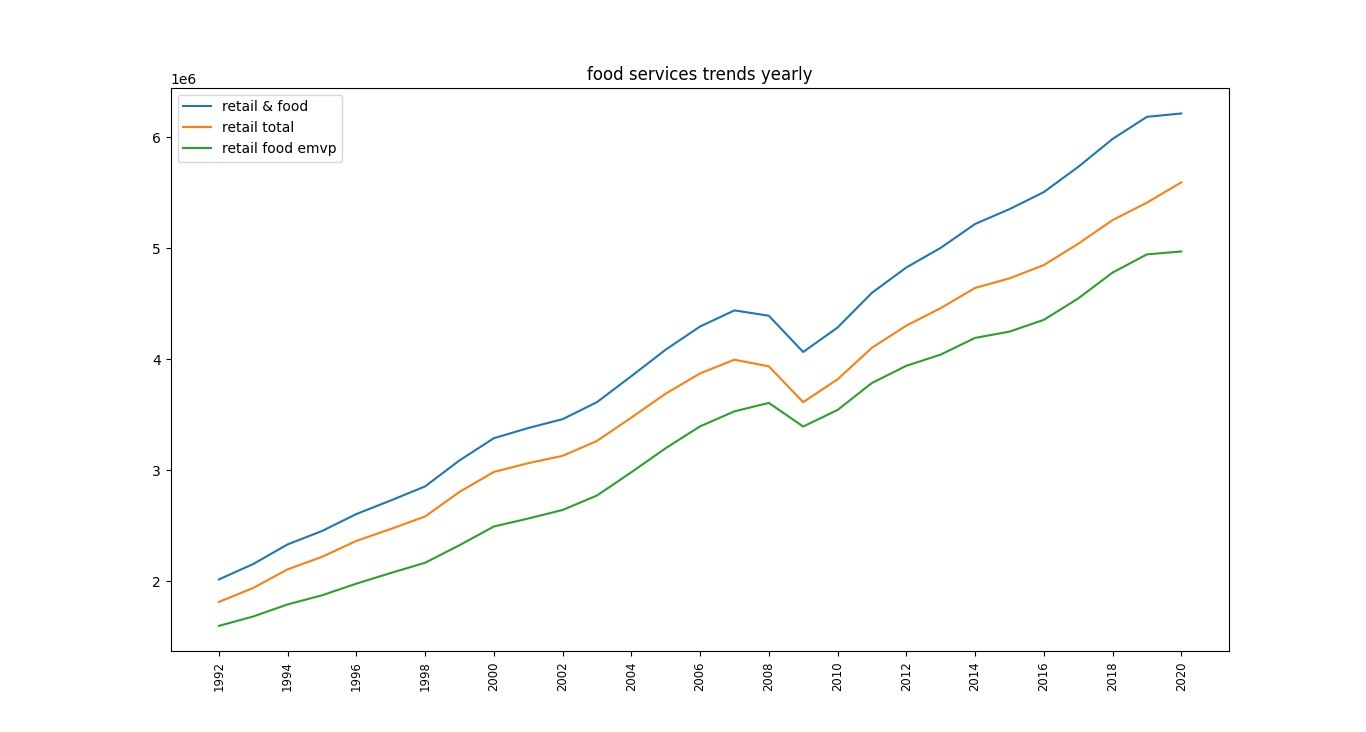

<h3>Hobby goods and sports good:</h3>

The interesting thing happened for hobby that I did not expect and it was that books sales and revenue went down while sports goods has an increase in sales especially near 2020
```
SELECT a.year,
     a.sum_books,
     a.hobby_toy,
        a.sum_books - LAG (a.sum_books) OVER (ORDER BY a.year) AS book_revenue_growth,
        LEAD (a.sum_books, 12) OVER (ORDER BY a.year) AS book_next_year_revenue,
        a.hobby_toy - LAG (a.hobby_toy) OVER (ORDER BY a.year) AS hobby_toy_revenue_growth,
        LEAD (a.hobby_toy, 12) OVER (ORDER BY a.year) AS hobby_toy_year_revenue,
        a.sport_goods - LAG (a.sport_goods) OVER (ORDER BY a.year) AS sport_goods_revenue_growth,
        LEAD (a.sport_goods, 12) OVER (ORDER BY a.year) AS sport_goods_year_revenue
from
(select right(date,4) as year,
     sum(Book_stores) as sum_books,
     sum(Hobby_toy_and_game_stores) as hobby_toy, 
     sum(Sporting_goods_stores) as sport_goods
     from dfmm
     group by year)a
```
    


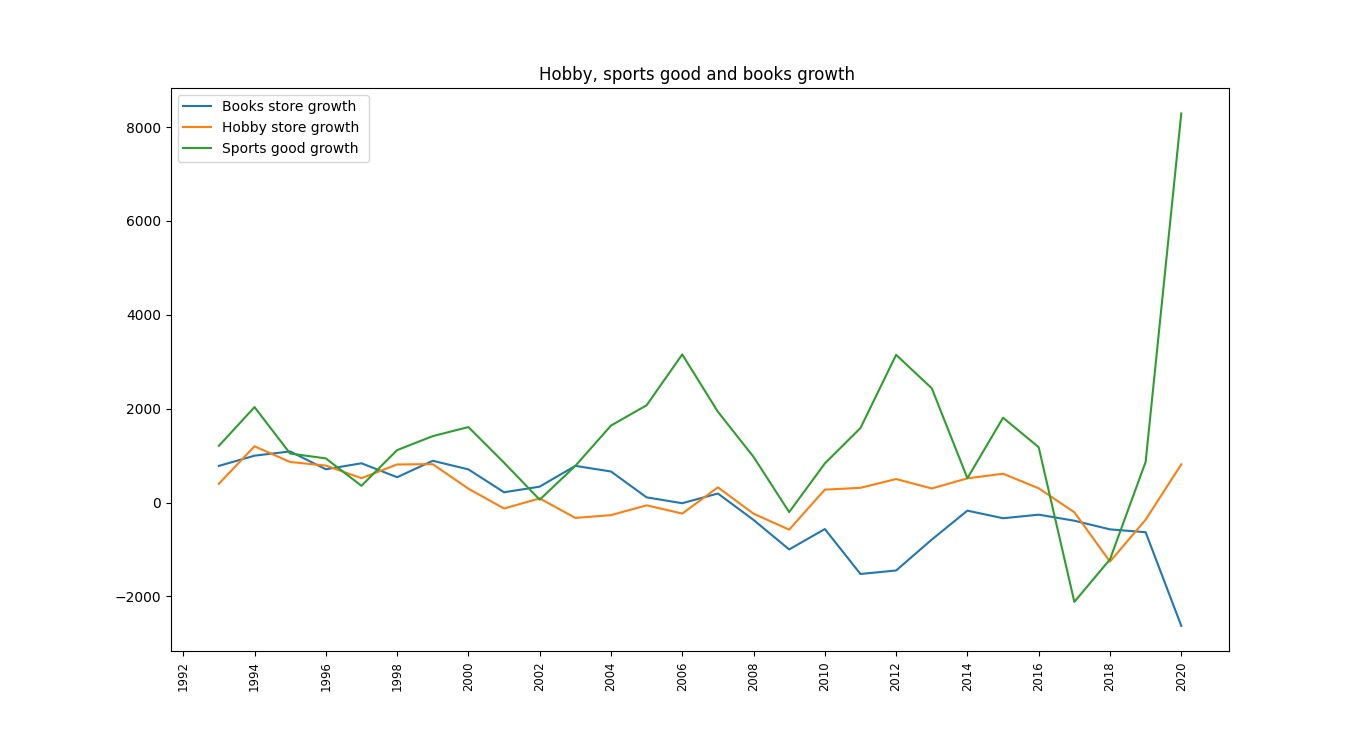

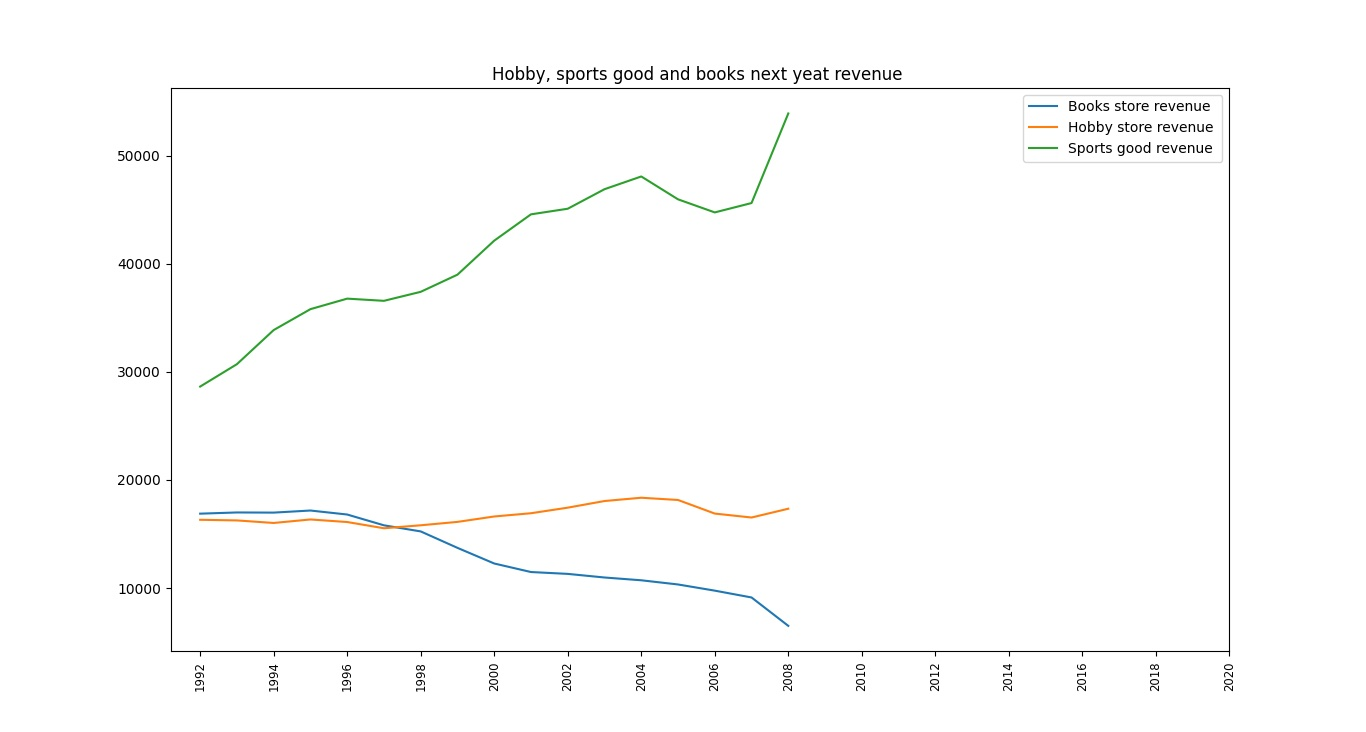

<h1>Explore Percentage Change:</h1>
<h3>Men vs women percent change:</h3>
Women clothing has more sales then men clothing. 
The year to year difference in sale shows spikes arounds 2015 for both and same with percent change. 

```
select
kk.year,
kk.Yearly_Retail_Sales,
kk.YOY_Difference,
kk.YOY_Difference/kk.Yearly_Retail_Sales *100 as 'Percentage women',
 
kk.men_Yearly_Retail_Sales,
kk.men_YOY_Difference ,
kk.men_YOY_Difference/kk.men_Yearly_Retail_Sales *100 as 'Percentage men'
from
(
select
ss.year,
ss.Womens_clothing_Retail_Food_Sales as Yearly_Retail_Sales,
ss.Womens_clothing_Retail_Food_Sales - ss.Sales_Previous_Year as YOY_Difference,
 
ss.mens_clothing_Retail_Food_Sales as men_Yearly_Retail_Sales,
ss.mens_clothing_Retail_Food_Sales - ss.men_Sales_Previous_Year as men_YOY_Difference 
 
from
(
select
tt.year,
tt.Womens_clothing_Retail_Food_Sales,
tt.mens_clothing_Retail_Food_Sales,
 
Lag(tt.Womens_clothing_Retail_Food_Sales) over (order by tt.year) as Sales_Previous_Year,
Lag(tt.mens_clothing_Retail_Food_Sales) over (order by tt.year) as men_Sales_Previous_Year
 
from
(
select
date as year,
sum(Womens_clothing_stores) as Womens_clothing_Retail_Food_Sales,
sum(Mens_clothing_stores) as mens_clothing_Retail_Food_Sales
from dfmm
group by year
)tt
 
)ss
 
)kk
```
 



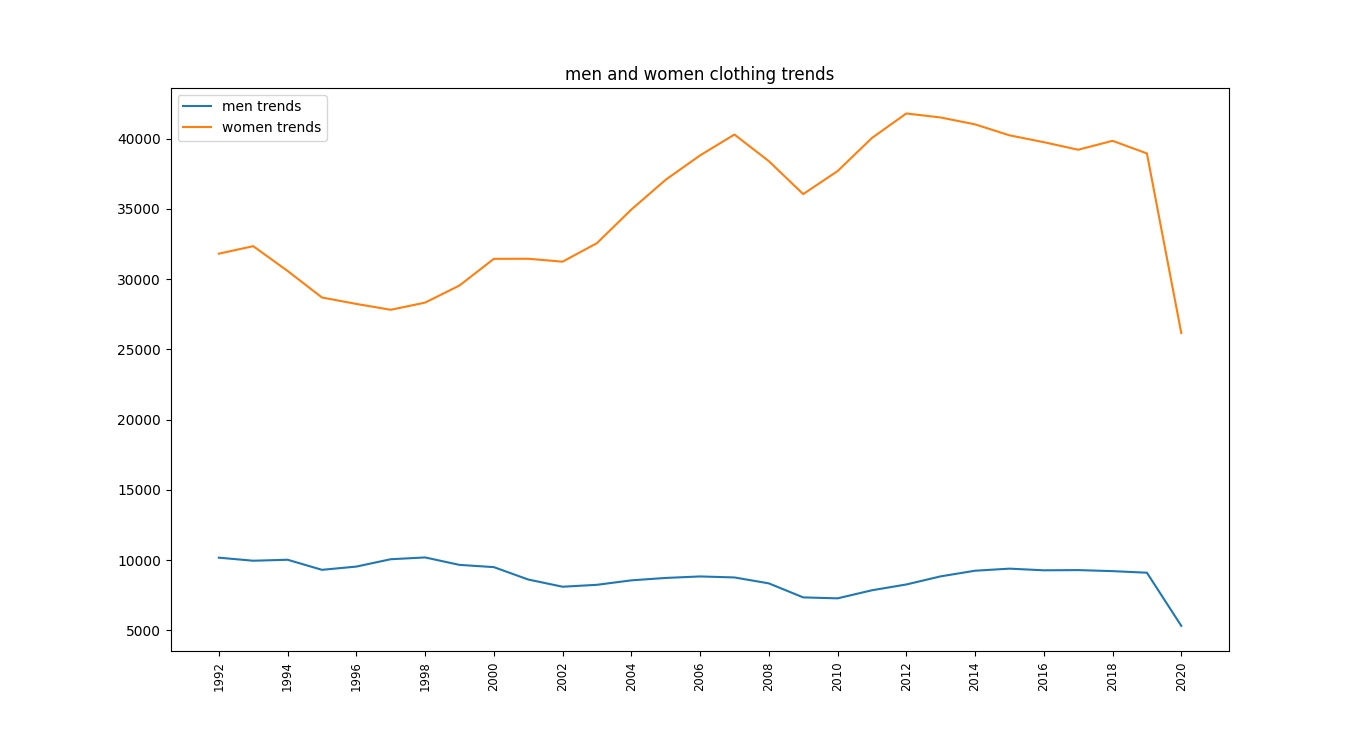

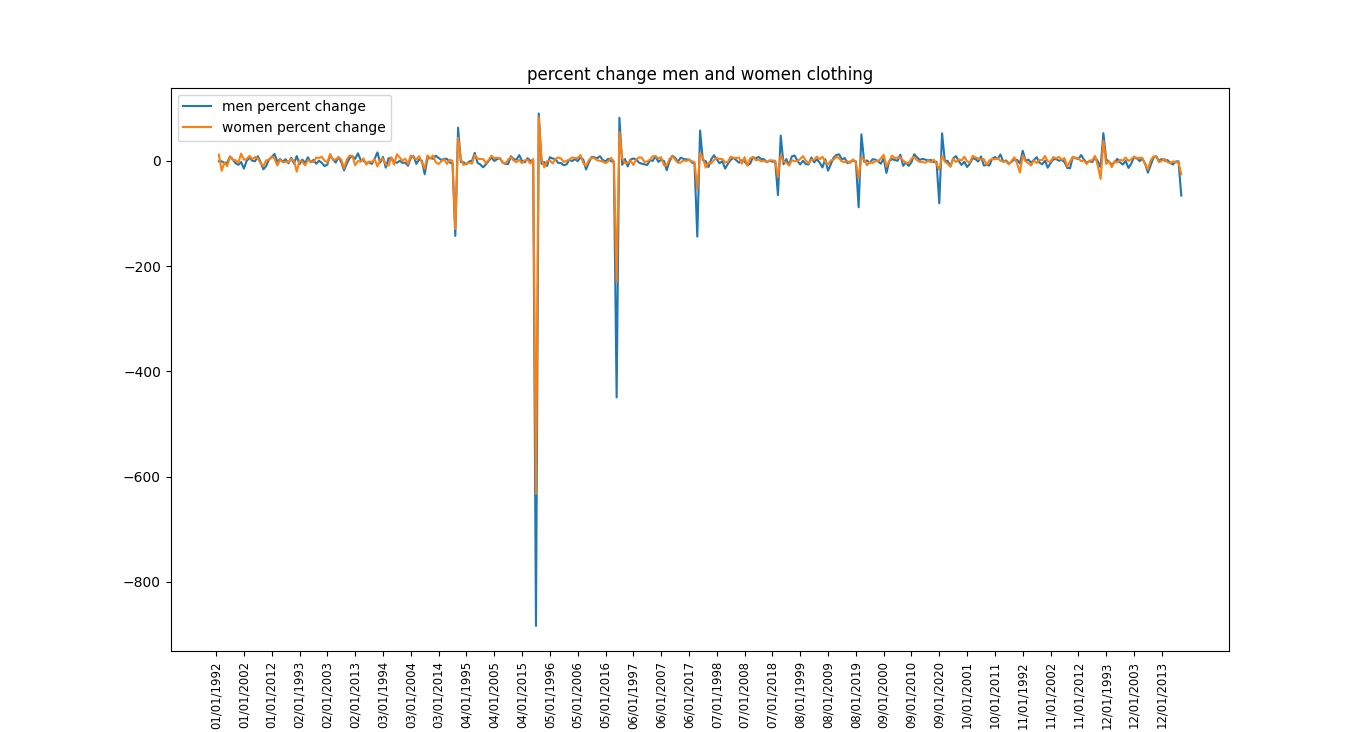

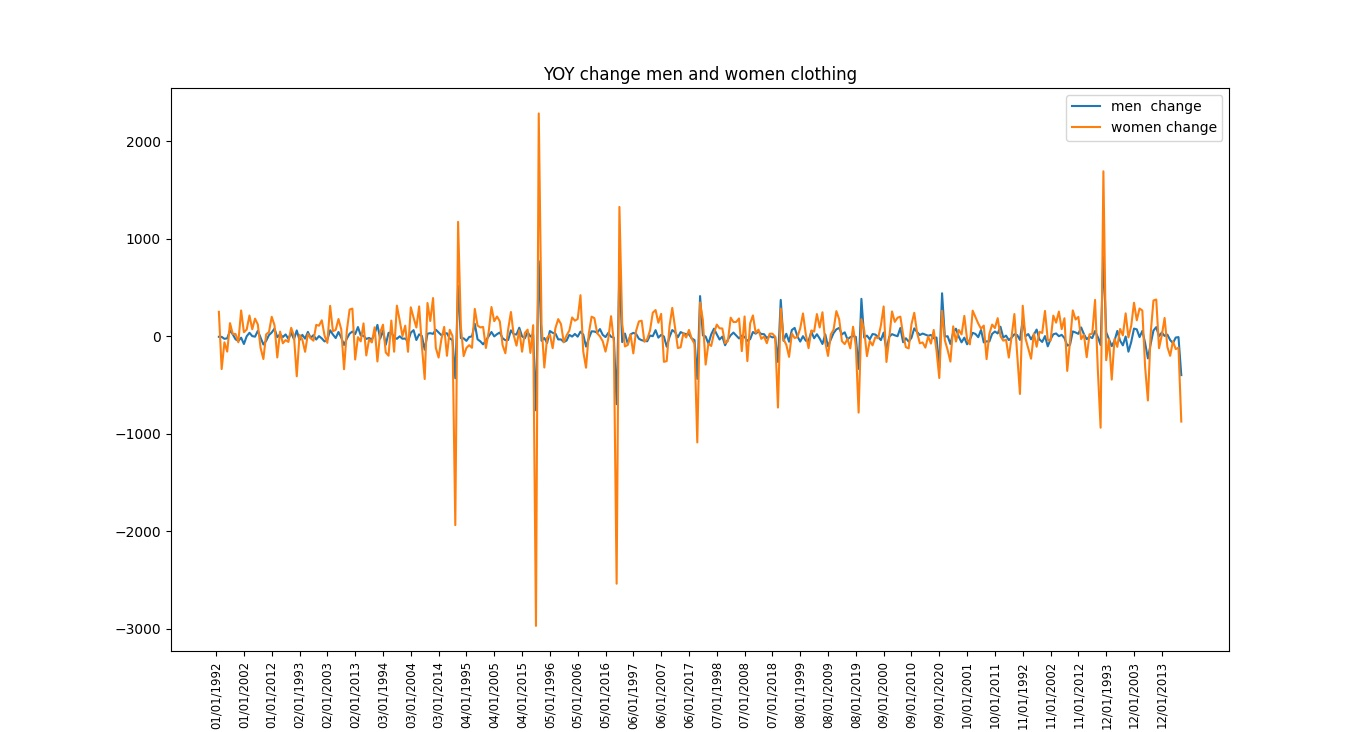

<h1>Explore Rolling Time Windows:</h1>
Two types of graphs were created for the rolling window. One comparing old and new car. While comparing new cars monthly vs yearly average  sales.


```select date, New_car_dealers,Used_car_dealers,
avg(New_car_dealers) over ( order by date
rows between 1 preceding and current row)
as one_month_moving_average_newcar,
 
avg(Used_car_dealers) over ( order by date
rows between 1 preceding and current row)
as one_month_moving_average_usecar
 from dfmm
 ````


New car month vs year rolling average
```
select date, New_car_dealers,
avg(New_car_dealers) over ( order by date 
rows between 1 preceding and current row)
as month_moving_average_newcar, 

avg(New_car_dealers) over ( order by date 
rows between 12 preceding and current row)
as year_moving_average_usecar
  from dfmm
  ```



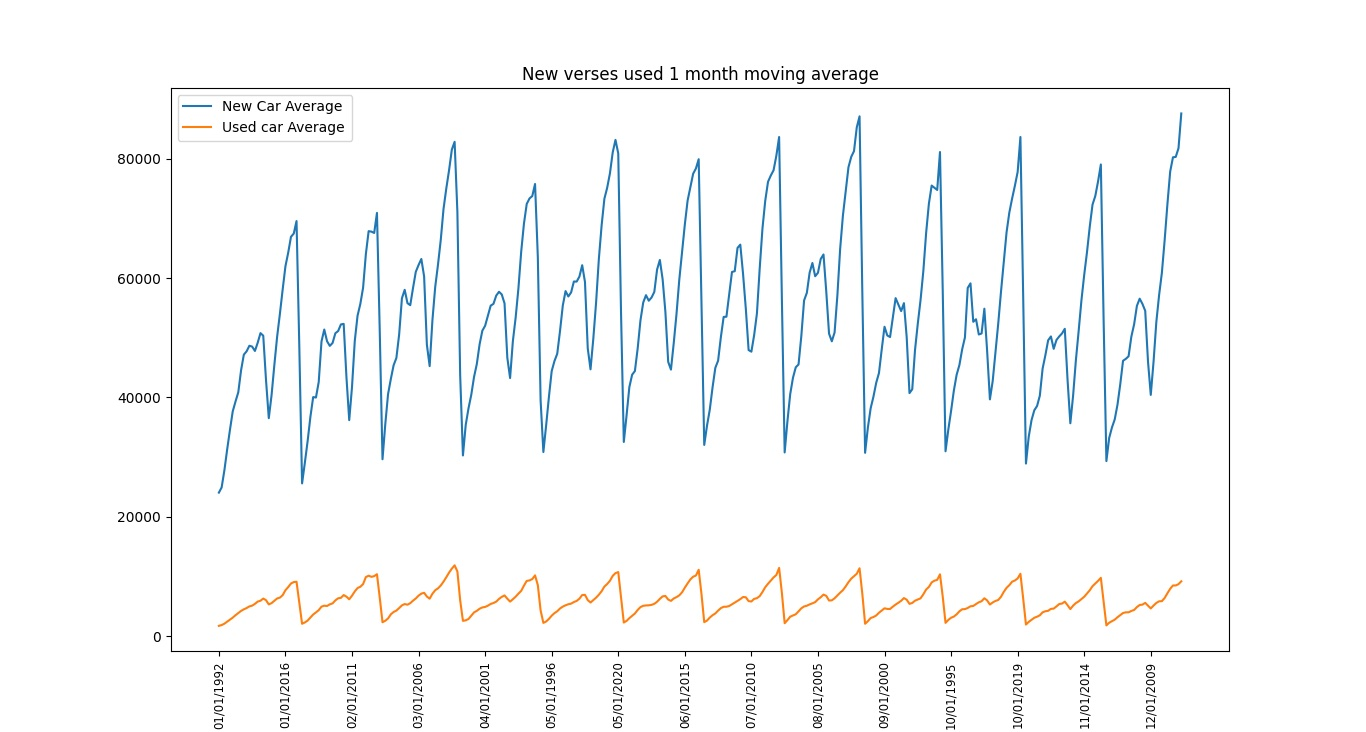

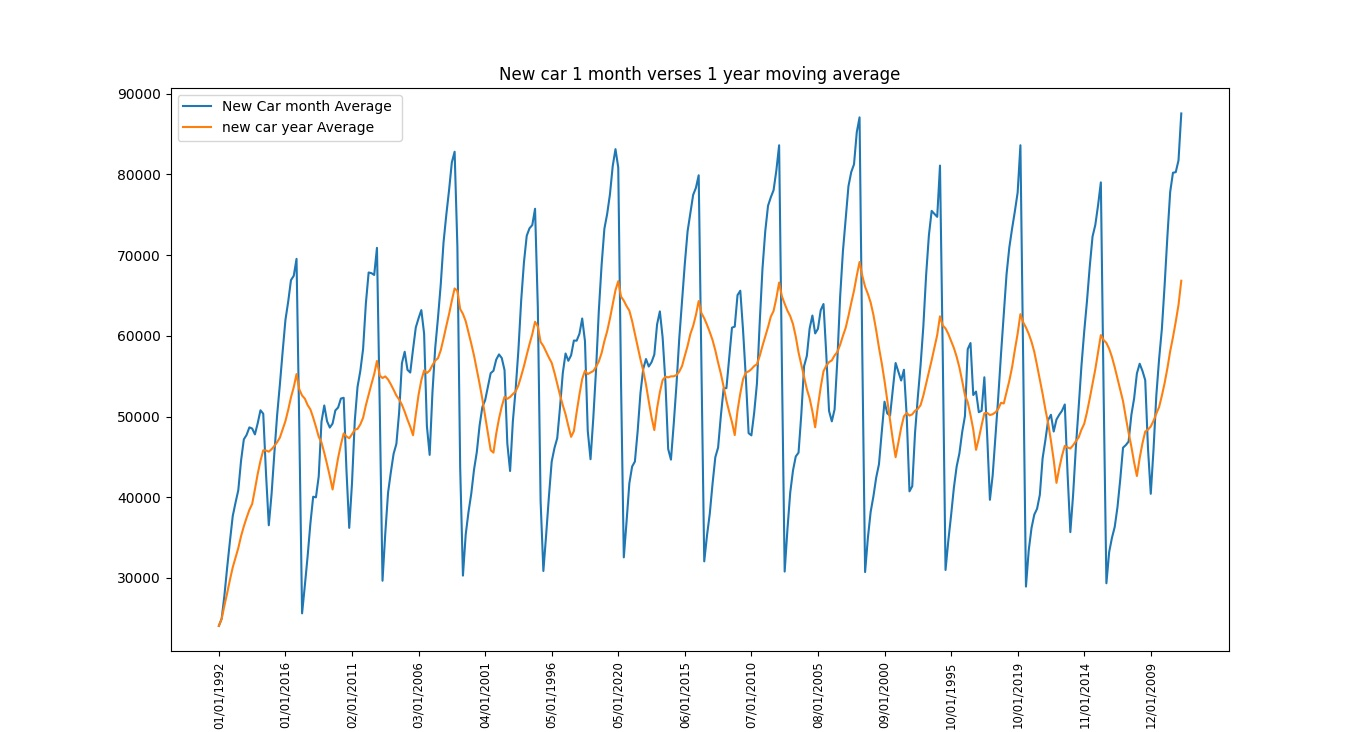

<h1>Conclusion:</h1>
The study showed an upwards trends for most businesses. Many businesses showed crashed during 2008. Some businesses had more sales during summer as compared to winter.
Bookstore business showed a downward trend of sales while sports business showed an upwards trend. 

